# Assignment - 7- C
## Object Segmentation using U-Net

## Introduction
In an image classification task, the network assigns a label (or class) to each input image. However, suppose you want to know the shape of that object, which pixel belongs to which object, etc. In this case, you need to assign a class to each pixel of the image—this task is known as segmentation. A segmentation model returns much more detailed information about the image. Image segmentation has many applications in medical imaging, self-driving cars and satellite imaging, just to name a few.

 U-Net was introduced in the paper, U-Net: Convolutional Networks for Biomedical Image Segmentation. The model architecture is fairly simple: an encoder (for downsampling) and a decoder (for upsampling) with skip connections. As Figure 1 shows, it shapes like the letter U hence the name U-Net.

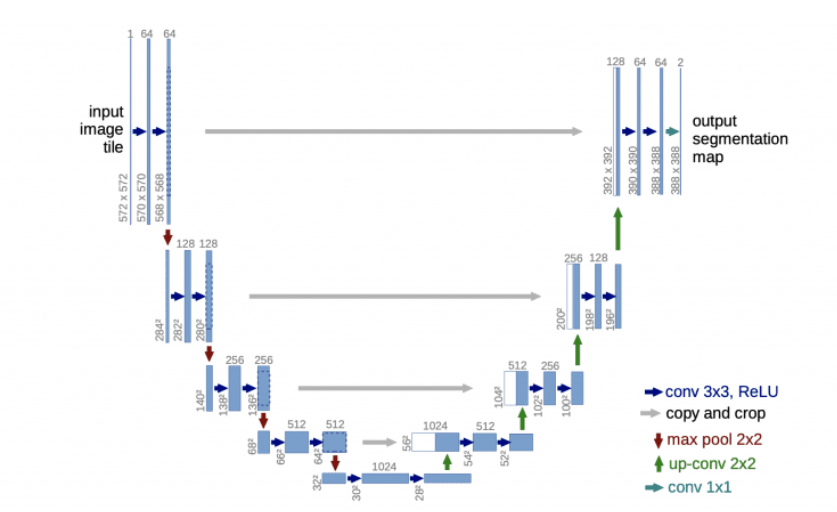


## Tasks
1. Load the Images and Masks and perform standard preprocessing techniques.
2. Origninally , this is 55 class classification. But to make it easier. Let's convert into a binary class classification. (Foregroud vs Background). To do so, you can implement the following logic for masks -
mask[mask>65] = 0 # to ensure backgroud is given class 0
mask[mask>0] = 1 # convering foreground to class 1.
3. Implement UNET architecture as shown above. As this is a classification problem, we will have sparse categorical cross entropy as loss function
4. Use data augmentation techniques to increase your data. Ex - rotation_range,width_shift_range,height_shift_range,shear_range,zoom_range,horizontal_flip. Make sure your masked image is also going through same transformations so ensure consistency.
5. Run the Unet model untill val loss is not imporiving any further (You can use callbacks). Also use tensorboard callback and observe the change of weights in the network.
6. Print the train vs val accuracy and loss. Also plot the image vs mask vs predicted mask for few images.


## Note -

Change the runtime type to T4 GPU on your colab. Without GPU , the model takes much longer.

## Dataset
* Original Dataset - https://www.kaggle.com/datasets/rajkumarl/people-clothing-segmentation
* This dataset suitable for our task is selected and is hosted in the following link. Refer labels.csv file to understand which category each label belongs to.

In [2]:
!gdown 1jPBwmlPCkX9engt0sohY3CsnlUlFLQsF

Downloading...
From: https://drive.google.com/uc?id=1jPBwmlPCkX9engt0sohY3CsnlUlFLQsF
To: /content/peopleclothingextracted-20231110T211336Z-001.zip
100% 653M/653M [00:10<00:00, 62.6MB/s]


In [ ]:
!unzip /content/peopleclothingextracted-20231110T211336Z-001.zip

In [7]:
# for data load
import os

# for reading and processing images
import imageio
from PIL import Image

# for visualizations
import matplotlib.pyplot as plt

import numpy as np # for using np arrays

In [5]:
def LoadData (path1, path2):
    """
    Looks for relevant filenames in the shared path
    Returns 2 lists for original and masked files respectively

    """
    # Read the images folder like a list
    image_dataset = os.listdir(path1)
    mask_dataset = os.listdir(path2)

    # Make a list for images and masks filenames
    orig_img = []
    mask_img = []
    for file in image_dataset:
        orig_img.append(file)
    for file in mask_dataset:
        mask_img.append(file)

    # Sort the lists to get both of them in same order (the dataset has exactly the same name for images and corresponding masks)
    orig_img.sort()
    mask_img.sort()

    return orig_img, mask_img

<ipython-input-8-9b326a84f6a7>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_view  = imageio.imread(os.path.join(path1, img[i]))
<ipython-input-8-9b326a84f6a7>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_view = imageio.imread(os.path.join(path2, mask[i]))


(825, 550, 3)
(825, 550)


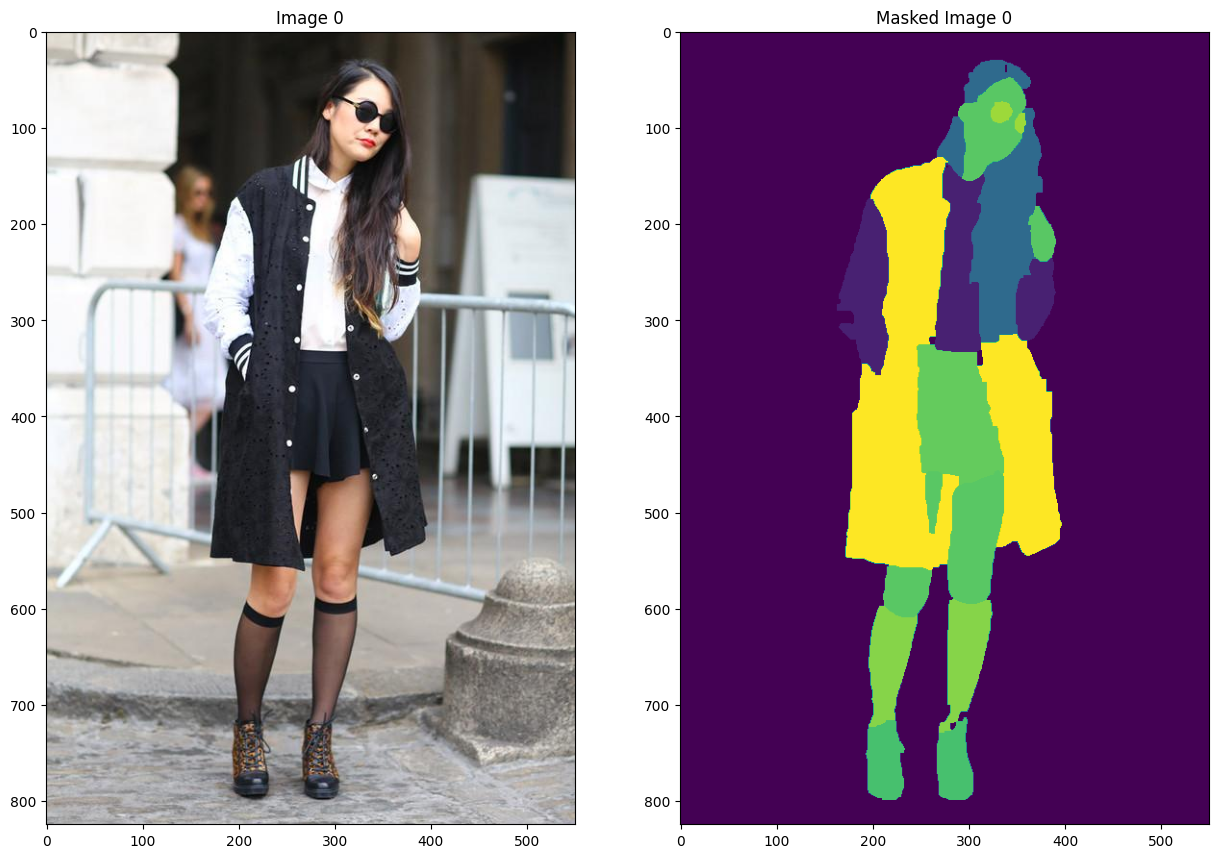

In [8]:
""" Load Train Set and view some examples """
# Call the apt function
path1 = '/content/peopleclothingextracted/png_images/IMAGES'
path2 = '/content/peopleclothingextracted/png_masks/MASKS'
img, mask = LoadData (path1, path2)

# View an example of image and corresponding mask
show_images = 1
for i in range(show_images):
    img_view  = imageio.imread(os.path.join(path1, img[i]))
    mask_view = imageio.imread(os.path.join(path2, mask[i]))
    print(img_view.shape)
    print(mask_view.shape)
    fig, arr = plt.subplots(1, 2, figsize=(15, 15))
    arr[0].imshow(img_view)
    arr[0].set_title('Image '+ str(i))
    arr[1].imshow(mask_view)
    arr[1].set_title('Masked Image '+ str(i))